In [1]:
# confusion matrix
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# macro averaged precision
from sklearn.metrics import f1_score, average_precision_score
from sklearn.preprocessing import label_binarize

# Generate class confusion matrix

In [2]:
def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Tweetynet WTS on Opensoundscape with Mixed Bird Other',
                      prediction_labels=True,
                      cmap=None,
                      normalize=True,
                      FONT_SIZE = 10,
                      figsize = (8*2, 6*2)):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions


    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    https://stackoverflow.com/questions/48855290/plotted-confusion-matrix-values-overlapping-each-other-total-classes-90

    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    
    plt.figure(figsize=figsize)    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
        plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    if (prediction_labels):
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         fontsize=FONT_SIZE,
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         fontsize=FONT_SIZE,
                         color="white" if cm[i, j] > thresh else "black")


    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
# read in saved data from training iterations
path_to_labels = './output/0_labels.txt'
path_to_predictions = './output/0_predictions.txt'

label = np.genfromtxt(path_to_labels, delimiter=',')
pred = np.genfromtxt(path_to_predictions, delimiter=',')

# create a confusion matrix
cm = confusion_matrix(label,pred)
cm

array([[ 27,   0,   0, ...,   0,   0,   0],
       [  0, 895,   0, ...,   0,   0,   0],
       [  0,   0, 138, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,  47,   0,   1],
       [  0,   0,   0, ...,   0,  14,   0],
       [  0,   2,   0, ...,   0,   0, 424]])

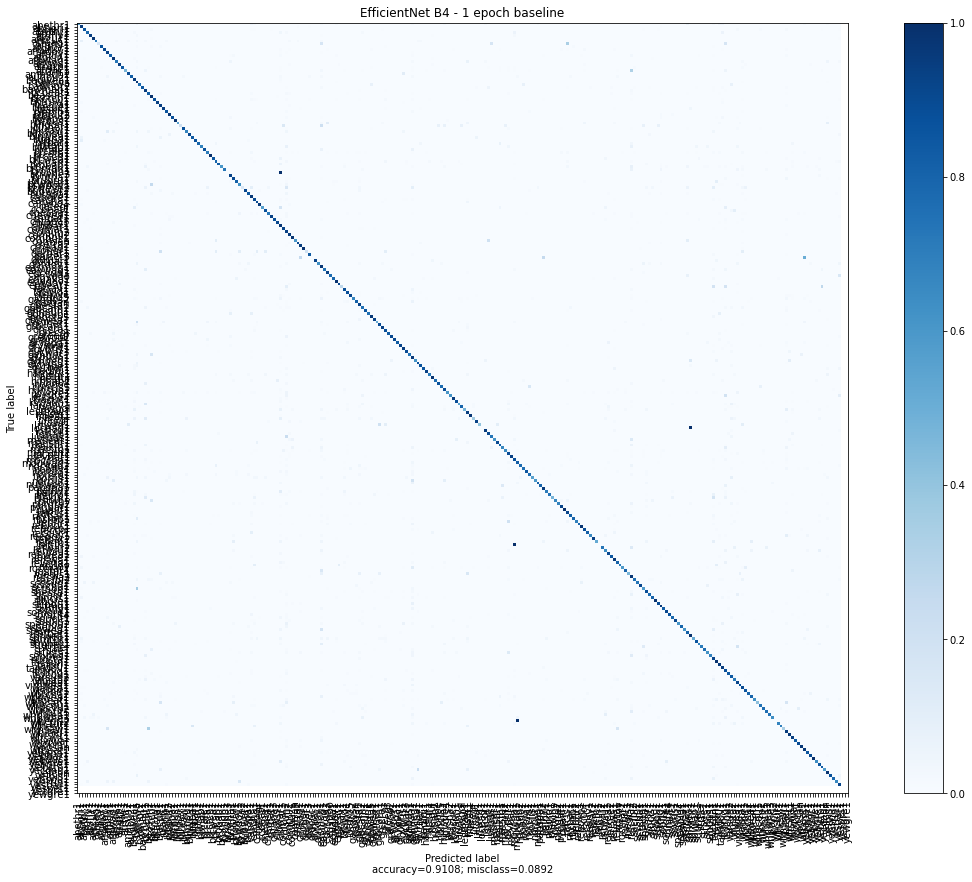

In [4]:
# get labels
train_metadata = pd.read_csv("/share/acoustic_species_id/train_metadata.csv")
target_names = train_metadata["primary_label"].unique()
plot_confusion_matrix_2(cm=cm, target_names=target_names,
                        title="EfficientNet B4 - 1 epoch baseline",
                        prediction_labels=False)

# Check cMAP

In [5]:
f1_score(label, pred, average='macro')

0.8058833932970415

In [6]:
def mAP(label, pred):
    # one hot encoding
    y_label = label_binarize(label, classes=range(len(target_names)))
    y_pred = label_binarize(pred, classes=range(len(target_names)))
    
    # tp/fp/precision
    true_pos = ((y_label == 1) & (y_pred == 1)).sum(axis=0)
    false_pos = ((y_label == 0) & (y_pred == 1)).sum(axis=0)
    precision = true_pos / (true_pos + false_pos)
    precision = np.nan_to_num(precision)
    num_species = precision.shape[0]
    return precision.sum() / num_species
mAP(label, pred)

/home/sprestrelski/miniconda3/envs/species-id/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


0.8469360206225752

In [7]:
# def padded_cmap(solution, submission, padding_factor=5):
#     solution = solution.drop(['row_id'], axis=1, errors='ignore')
#     submission = submission.drop(['row_id'], axis=1, errors='ignore')
#     new_rows = []
#     for i in range(padding_factor):
#         new_rows.append([1 for i in range(len(solution.columns))])
#     new_rows = pd.DataFrame(new_rows)
#     new_rows.columns = solution.columns
#     padded_solution = pd.concat([solution, new_rows]).reset_index(drop=True).copy()
#     padded_submission = pd.concat([submission, new_rows]).reset_index(drop=True).copy()
#     score = sklearn.metrics.average_precision_score(
#         padded_solution.values,
#         padded_submission.values,
#         average='macro',
#     )
#     return score